# EDA

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [70]:
df = pd.read_csv('../data/raw/labeled.csv')
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14412 entries, 0 to 14411
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   comment  14412 non-null  object 
 1   toxic    14412 non-null  float64
dtypes: float64(1), object(1)
memory usage: 225.3+ KB


In [72]:
df.nunique()

comment    14412
toxic          2
dtype: int64

#### Распределение целевой переменной

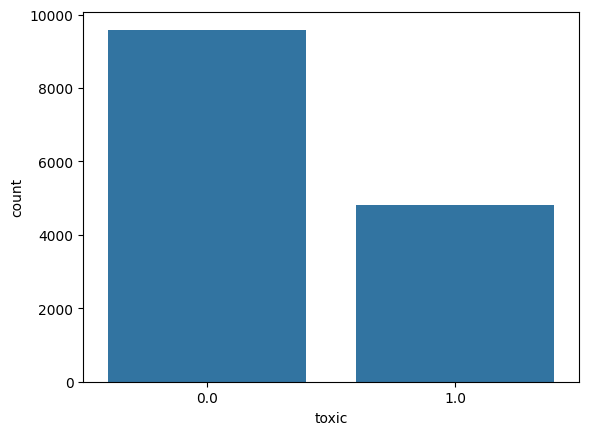

In [73]:
sns.countplot(data=df, x='toxic')
plt.show()

#### Зависимость целевой переменной от количества слов/символов

In [74]:
df['word_count'] = df['comment'].apply(lambda r: len(r.split()))
df['sym_count'] = df['comment'].apply(lambda r: len(r))

<Axes: xlabel='toxic', ylabel='sym_count'>

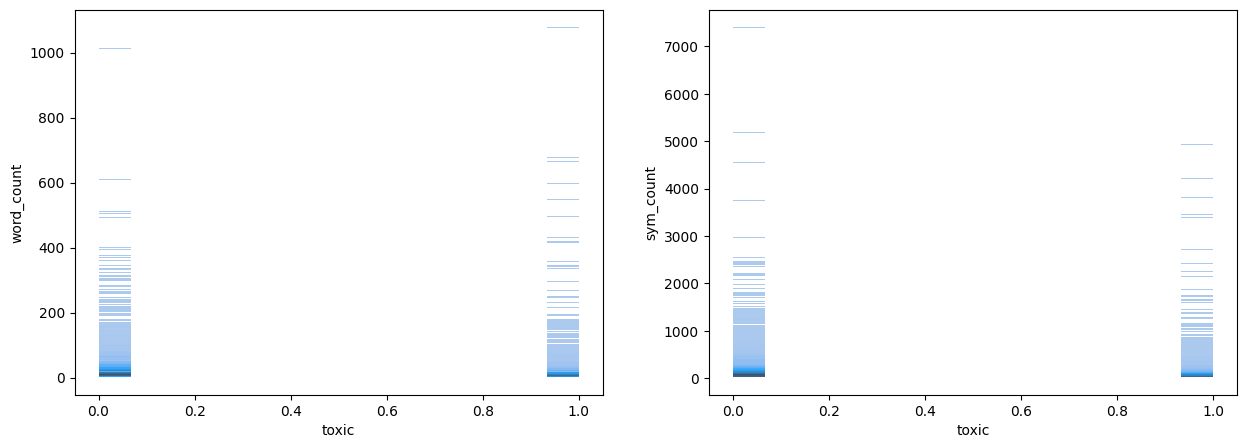

In [75]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x='toxic', y='word_count', ax=ax[0])
sns.histplot(data=df, x='toxic', y='sym_count', ax=ax[1])

#### Определение самых частых слов по целевой переменной

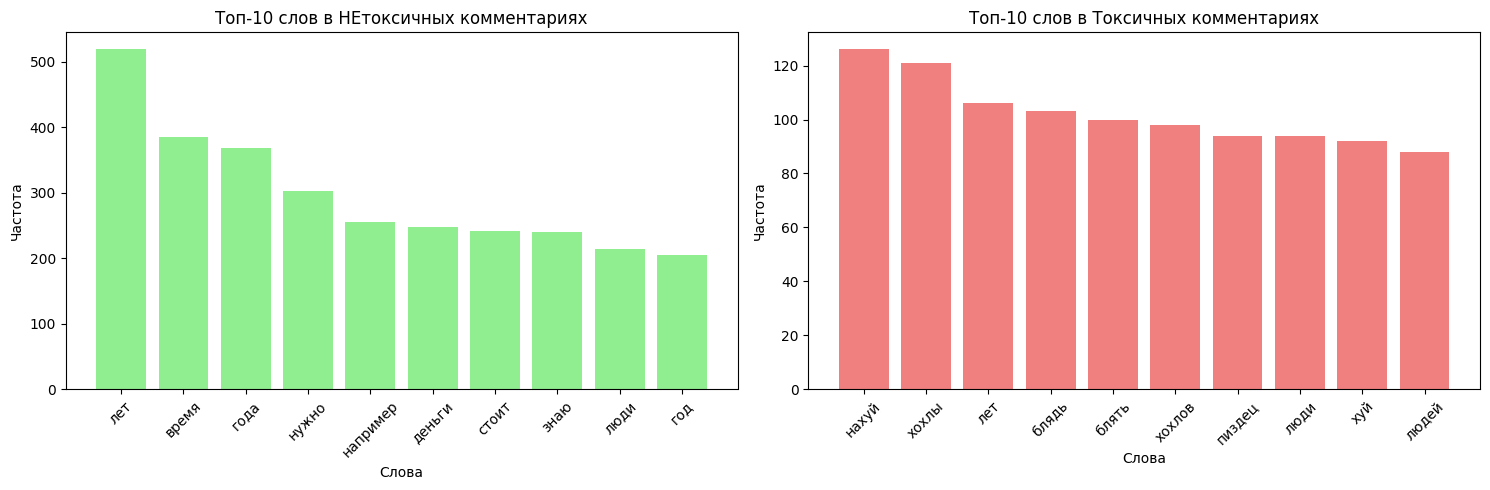

In [76]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('russian'))
stop_words = stop_words.union(set([
    'это', 
    'очень', 
    'вообще', 
    'всё', 
    'ещё', 
    "просто", 
    "почему", 
    "которые",
    "который",
    "просто",
    "это",
    "пока",
    "хотя",
    "вроде",
    "тебе",
    "твой",
    "чтото",
    "такой",
    "такие",
    "такое",
]))

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text, language='russian')
    cleaned_tokens = []
    for t in tokens:
        if t not in stop_words and t.isalpha() and len(t) > 2:
            lemma = lemmatizer.lemmatize(t)
            cleaned_tokens.append(lemma)
    return cleaned_tokens

non_toxic_tokens = []
for t in df[df['toxic'] == 0.0]['comment']:
    non_toxic_tokens.extend(preprocess_text(t))

counter_non_toxic = Counter(non_toxic_tokens)
top_non_toxic_words = [word for word, _ in counter_non_toxic.most_common(10)]
top_non_toxic_counts = [count for _, count in counter_non_toxic.most_common(10)]

toxic_tokens = []
for t in df[df['toxic'] == 1.0]['comment']:
    toxic_tokens.extend(preprocess_text(t))

counter_toxic = Counter(toxic_tokens)
top_toxic_words = [word for word, _ in counter_toxic.most_common(10)]
top_toxic_counts = [count for _, count in counter_toxic.most_common(10)]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].bar(top_non_toxic_words, top_non_toxic_counts, color='lightgreen')
axes[0].set_title('Топ-10 слов в НЕтоксичных комментариях')
axes[0].set_xlabel('Слова')
axes[0].set_ylabel('Частота')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(top_toxic_words, top_toxic_counts, color='lightcoral')
axes[1].set_title('Топ-10 слов в Токсичных комментариях')
axes[1].set_xlabel('Слова')
axes[1].set_ylabel('Частота')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

*Можно сделать вывод, что токсичные комментарии можно определить по наличию матерных слов в них. В нетоксичной выборке же, определить прямую корреляцию между словами и оттенком комментария затруднительно.*